In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import cross_validate, StratifiedKFold

In [ ]:
#Carregamento dos dados disponibilizado para o problema de multiclase

dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/dados_estudantes.csv")

In [4]:
dados

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Solteiro,Não,Masculino,19,Não,Não,Não,Sim,Não,15.5,...,5,13.600000,0,0,6,8,5,12.666667,0,Graduado
4420,Solteiro,Sim,Feminino,18,Sim,Não,Sim,Não,Não,11.1,...,6,12.000000,0,0,6,6,2,11.000000,0,Desistente
4421,Solteiro,Sim,Feminino,30,Não,Não,Não,Sim,Sim,13.9,...,7,14.912500,0,0,8,9,1,13.500000,0,Desistente
4422,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Sim,9.4,...,5,13.800000,0,0,5,6,5,12.000000,0,Graduado


In [5]:
dados.columns

Index(['Estado civil', 'Migração', 'Sexo', 'Idade na matrícula', 'Estrangeiro',
       'Necessidades educacionais especiais', 'Devedor',
       'Taxas de matrícula em dia', 'Bolsista', 'Taxa de desemprego',
       'Taxa de inflação', 'PIB', 'Curso', 'Período', 'Qualificação prévia',
       'disciplinas 1º semestre (creditadas)',
       'disciplinas 1º semestre (matriculadas)',
       'disciplinas 1º semestre (avaliações)',
       'disciplinas 1º semestre (aprovadas)',
       'disciplinas 1º semestre (notas)',
       'disciplinas 1º semestre (sem avaliações)',
       'disciplinas 2º semestre (creditadas)',
       'disciplinas 2º semestre (matriculadas)',
       'disciplinas 2º semestre (avaliações)',
       'disciplinas 2º semestre (aprovadas)',
       'disciplinas 2º semestre (notas)',
       'disciplinas 2º semestre (sem avaliações)', 'Target'],
      dtype='object')

In [9]:
linhas, colunas = dados.shape
print(f'Total de Linhas:{linhas}')
print(f'Total de Colunas:{colunas}')

Total de Linhas:4424
Total de Colunas:28


In [7]:
for coluna in dados.columns:
    print(coluna)

Estado civil
Migração
Sexo
Idade na matrícula
Estrangeiro
Necessidades educacionais especiais
Devedor
Taxas de matrícula em dia
Bolsista
Taxa de desemprego
Taxa de inflação
PIB
Curso
Período
Qualificação prévia
disciplinas 1º semestre (creditadas)
disciplinas 1º semestre (matriculadas)
disciplinas 1º semestre (avaliações)
disciplinas 1º semestre (aprovadas)
disciplinas 1º semestre (notas)
disciplinas 1º semestre (sem avaliações)
disciplinas 2º semestre (creditadas)
disciplinas 2º semestre (matriculadas)
disciplinas 2º semestre (avaliações)
disciplinas 2º semestre (aprovadas)
disciplinas 2º semestre (notas)
disciplinas 2º semestre (sem avaliações)
Target


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

In [44]:
dados.describe()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,11.566139,1.228029,0.001969,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316
std,7.587816,2.663850,1.382711,2.269935,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774
min,17.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,9.400000,0.300000,-1.700000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000
50%,20.000000,11.100000,1.400000,0.320000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000
75%,25.000000,13.900000,2.600000,1.790000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000
max,70.000000,16.200000,3.700000,3.510000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000


In [10]:
#Verificação da variavel target

dados['Target'].unique()

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

#Exploração dos dados da BD disponibilizado

#1) - Estado civil

#2) - Migração

#3) - Sexo

#4) - Idade na inscrição

#5) - Estrangeiro

In [11]:
dados['Estado civil'].value_counts(normalize=True)*100

Estado civil
Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: proportion, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


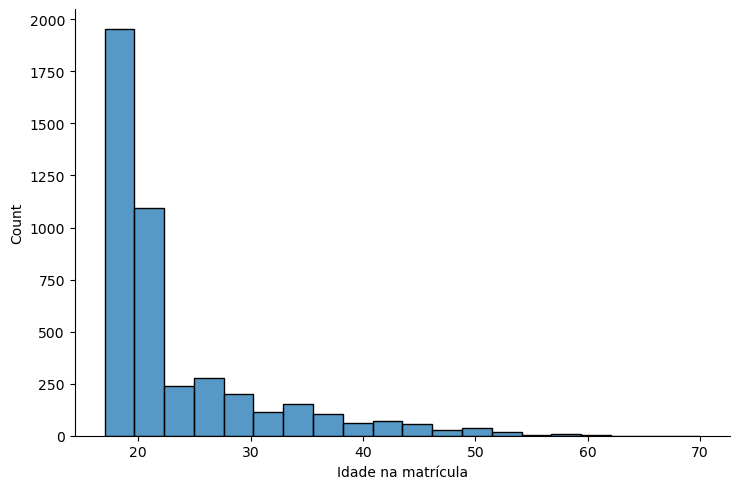

In [17]:
sns.displot(dados['Idade na matrícula'], bins=20, height=5, aspect=1.5)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1600x1200 with 0 Axes>

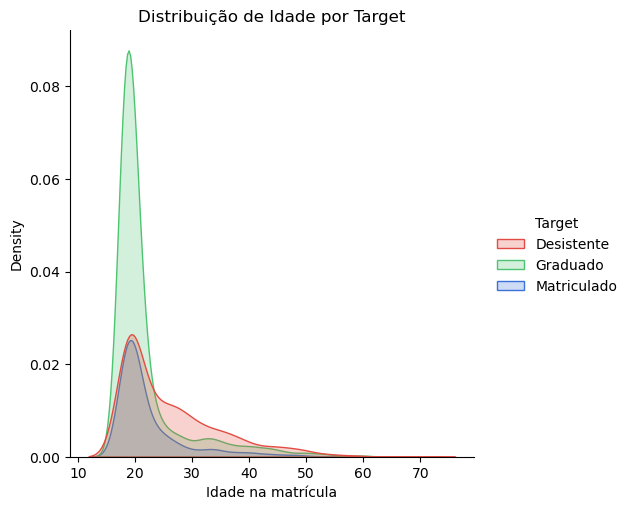

In [ ]:
color_dict = {'Desistente': '#e34c42','Graduado': '#4dc471', 'Matriculado': '#3b71db'}
sns.set_palette(list(color_dict.values()))

sns.displot(data=dados, x='Idade na matrícula', hue='Target', kind='kde', fill=True)
plt.title("Distribuição de Idade por Target")
plt.show()

In [22]:
dados['Estrangeiro'].value_counts(normalize=True) * 100

Estrangeiro
Não    97.513562
Sim     2.486438
Name: proportion, dtype: float64

In [23]:
dados['Sexo'].value_counts(normalize=True) * 100

Sexo
Feminino     64.82821
Masculino    35.17179
Name: proportion, dtype: float64

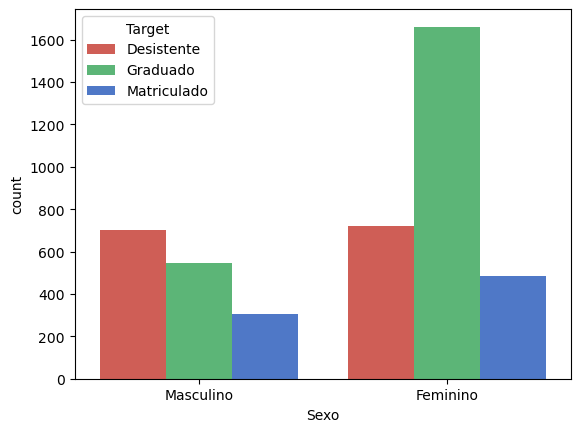

In [24]:
sns.countplot(x='Sexo', hue='Target', data=dados)
plt.show()

#Analise dos dados Socioeconómicos

#1) - Necessidades Educacionais especiais

#2) - Devedor

#3) - Taxa de Matricula em dia

#4) - Bolseiros

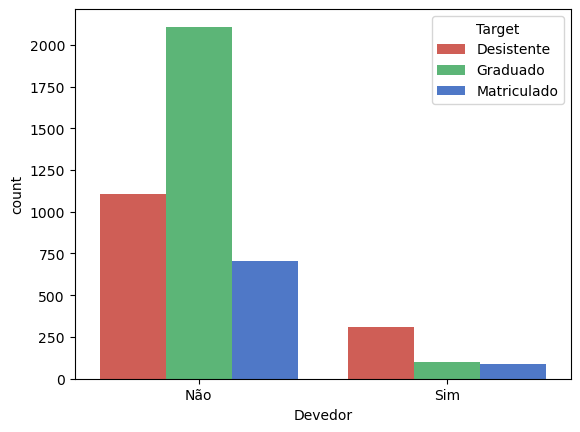

In [26]:
sns.countplot(x='Devedor', hue='Target', data=dados)
plt.show()

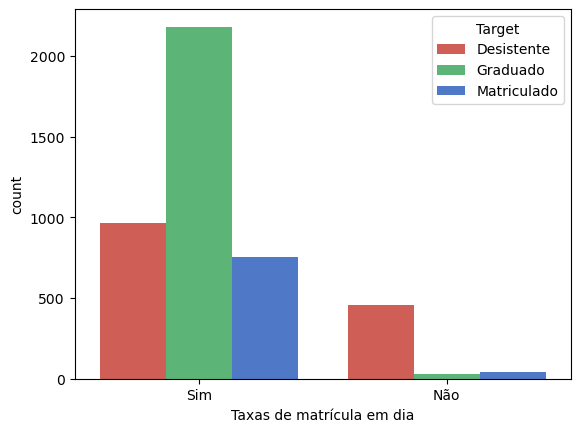

In [28]:
sns.countplot(x="Taxas de matrícula em dia", hue='Target', data=dados)
plt.show()

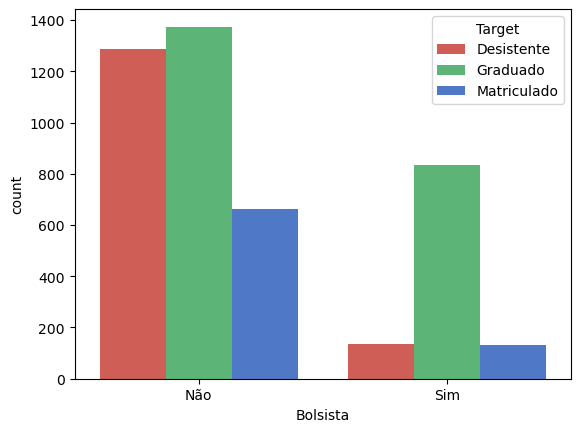

In [29]:
sns.countplot(x='Bolsista', hue='Target', data=dados)
plt.show()

Exploração dos dados no momento da Matrícula

1) Curso

2) Período

3) Qualificação prévia


In [ ]:
# Calcula as contagens das combinações Curso-Target

contagem = dados.groupby(['Curso', 'Target']).size().reset_index(name="Contagem")
contagem.head()

,Curso,Target,Contagem
0,Agronomia,Desistente,86
1,Agronomia,Graduado,87
2,Agronomia,Matriculado,37
3,Animação e Design Multimídia,Desistente,82
4,Animação e Design Multimídia,Graduado,96


In [35]:
# Calcular as porcentagens da variavel contagem
contagem['Porcentagem'] = contagem.groupby("Curso")['Contagem'].transform(lambda x: (x / x.sum()) * 100)
contagem['Porcentagem'].head()

0    40.952381
1    41.428571
2    17.619048
3    38.139535
4    44.651163
Name: Porcentagem, dtype: float64

In [39]:
#Definição do gráfico interativo para a variavel contagem
fig = px.bar(contagem, y='Curso', x='Porcentagem', color='Target', orientation='h',
             color_discrete_map={'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'})
fig.show()

Analise dos dados Académicos

1) disciplinas creditadas
2) disciplinas matriculadas
3) disciplinas avaliações
4) disciplinas aprovadas
5) disciplinas notas
6) disciplinas sem avaliações
7) disciplinas faltas

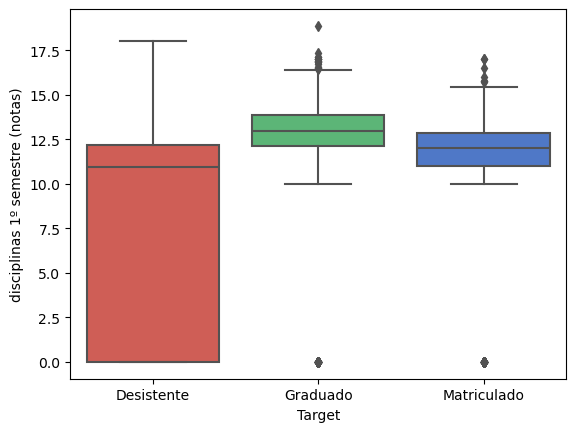

In [40]:
sns.boxplot(x='Target', y='disciplinas 1º semestre (notas)', data=dados)
plt.show()

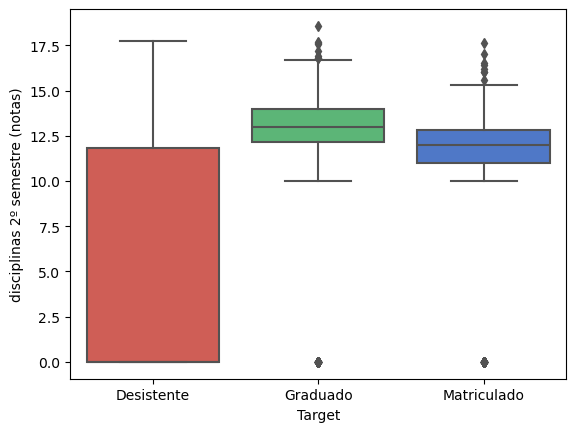

In [41]:
sns.boxplot(x='Target', y='disciplinas 2º semestre (notas)', data=dados)
plt.show()

In [42]:
dados['Target'].value_counts(normalize=True) * 100

Target
Graduado       49.932188
Desistente     32.120253
Matriculado    17.947559
Name: proportion, dtype: float64

Preparação dos dados para o Treinamento

1) Seleção das colunas Categoricas
2) Transformação das conlunas com OneHotEncoder
3) Ajuste e criação de um novo dataframe para o modelo
4) Combinação das colunas codificadas com as colunas não codificadas


In [47]:
categoricas_col = ['Migração', 'Sexo','Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',
                     'Taxas de matrícula em dia', 'Bolsista', 'Período','Estado civil', 'Curso', 'Qualificação prévia']

In [ ]:
dados_cat = dados[categoricas_col]

encoder = OneHotEncoder(drop='if_binary')

dados_encoded = pd.DataFrame(encoder.fit_transform(dados_cat).toarray(), 
                             columns=encoder.get_feature_names_out(categoricas_col))

In [49]:

dados_final = pd.concat([dados.drop(categoricas_col, axis=1), dados_encoded], axis=1)

In [50]:
dados_final.head()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Separação dos dados para o treinamento, validação e Teste dos modelos

In [52]:
x = dados_final.drop('Target', axis=1)
y = dados_final['Target']

In [53]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, stratify=y, random_state=0)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify=y, random_state=0)

In [55]:
#Aplicação do modelo Random Forest Classifier

rf_modelo = RandomForestClassifier(random_state=0)
rf_modelo.fit(x_treino, y_treino)
y_pred = rf_modelo.predict(x_val)
print(f'Acurácia de treino: {rf_modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {rf_modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9975177304964539
Acurácia de validação: 0.7680851063829788


In [ ]:
#Teste com uma arvores de profundidade = 10

rf_modelo = RandomForestClassifier(random_state=0, max_depth=10)
rf_modelo.fit(x_treino, y_treino)
y_pred = rf_modelo.predict(x_val)
print(f'Acurácia de treino: {rf_modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {rf_modelo.score(x_val, y_val)}')

Acurácia de treino: 0.898936170212766
Acurácia de validação: 0.7734042553191489


Avaliação do modelo usando a matriz confusão

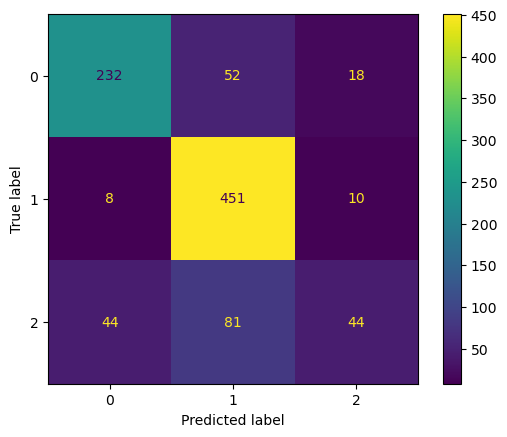

In [58]:
matriz_conf = confusion_matrix(y_val, y_pred)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_conf)
visual.plot()

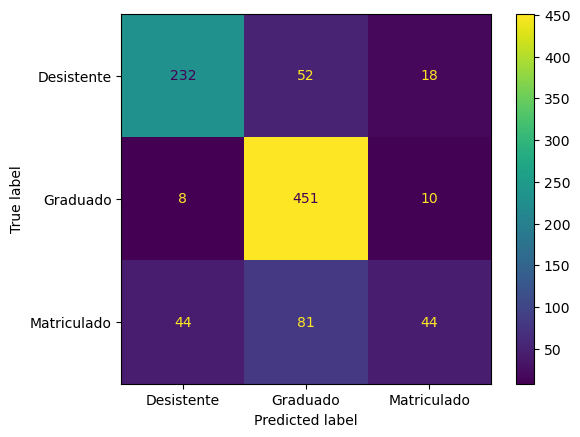

In [59]:
visual = ConfusionMatrixDisplay(confusion_matrix = matriz_conf, display_labels=rf_modelo.classes_)
visual.plot()

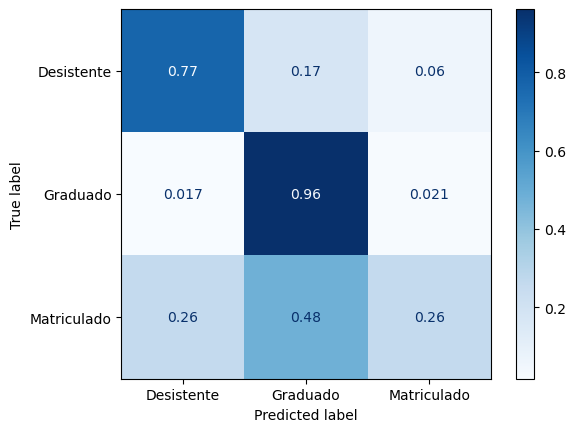

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize= 'true', cmap = 'Blues');

Analise do relatório das Métricas

In [62]:
relatorio = classification_report(y_val, y_pred)
print("Relatório de Classificação: \n", relatorio)

Relatório de Classificação: 
               precision    recall  f1-score   support

  Desistente       0.82      0.77      0.79       302
    Graduado       0.77      0.96      0.86       469
 Matriculado       0.61      0.26      0.37       169

    accuracy                           0.77       940
   macro avg       0.73      0.66      0.67       940
weighted avg       0.76      0.77      0.75       940



Aplicação de Técnica de Superamostragem

In [63]:
y_treino.value_counts()

Target
Graduado       1408
Desistente      906
Matriculado     506
Name: count, dtype: int64

In [70]:
oversample = SMOTE(random_state=0)
x_balanceado, y_balanceado = oversample.fit_resample(x_treino, y_treino)

In [71]:
y_balanceado.value_counts()

Target
Desistente     1408
Graduado       1408
Matriculado    1408
Name: count, dtype: int64

In [72]:
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo.predict(x_val)

Analise do relatório das Métricas após o Balanceamento dos dados

              precision    recall  f1-score   support

  Desistente       0.84      0.72      0.77       302
    Graduado       0.80      0.86      0.83       469
 Matriculado       0.48      0.51      0.49       169

    accuracy                           0.75       940
   macro avg       0.71      0.70      0.70       940
weighted avg       0.76      0.75      0.75       940



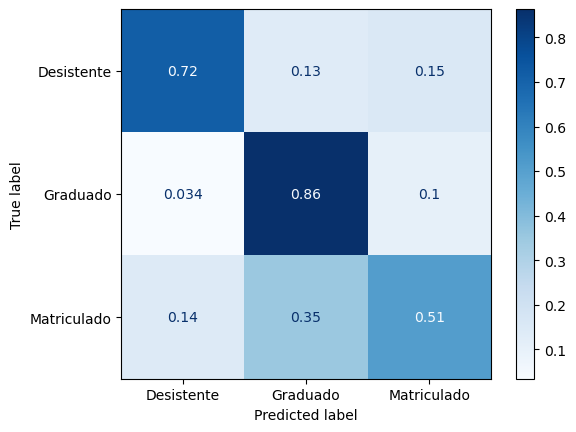

In [74]:
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

Validação do Modelo 

Pipeline para validação

In [76]:
modelo = RandomForestClassifier(max_depth=10)
pipeline = imbpipeline([('oversample',SMOTE()), ('floresta', modelo)])

In [78]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring='recall_weighted')
cv_resultados['test_score']

array([0.76994681, 0.74069149, 0.74468085, 0.77260638, 0.76196809])

In [79]:
#intevalo de confiança
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f"Intervalo de Confinaça: [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]")

Intervalo de Confinaça: [0.7319203218852854, 0.7840371249232254]


Teste do modelo

              precision    recall  f1-score   support

  Desistente       0.86      0.74      0.80       213
    Graduado       0.82      0.85      0.83       332
 Matriculado       0.49      0.56      0.52       119

    accuracy                           0.76       664
   macro avg       0.72      0.72      0.72       664
weighted avg       0.77      0.76      0.77       664



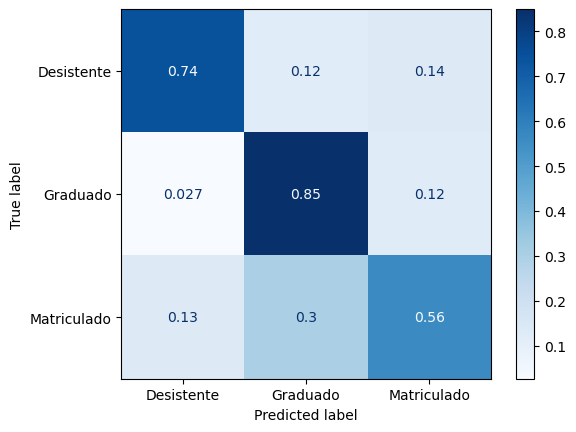

In [80]:
oversample = SMOTE(random_state=0)
x_balanceado, y_balanceado = oversample.fit_resample(x, y)
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo.predict(x_teste)

print(classification_report(y_teste, y_pred))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, normalize='true', cmap='Blues')